In [2]:
#1.Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
# first 10 rows.

# first import required libraries first
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#first read bike details from csv
df = pd.read_csv('/content/BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
#print first 10 records
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [4]:
#shape
df.shape


(1061, 7)

In [5]:
#columns
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [6]:
# get all info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [7]:
#Question 2: Check for missing values in all columns and describe your approach for
# handling them.

# First is their any null values
df.isnull().sum()



,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [8]:

#here showroom price is crucial so impute those missing values
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(),inplace=True)

df.isnull().sum()

# I checked missing values using df.isnull().sum() and found that only the ex_showroom_price column has about 41% missing data.
# Since this is a significant portion, I would first assess how important this feature is for my analysis.
# If it’s not critical, I’d drop it to avoid bias. Otherwise, I’d impute the missing values using the median or a KNN-based imputation technique to preserve data quality.


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


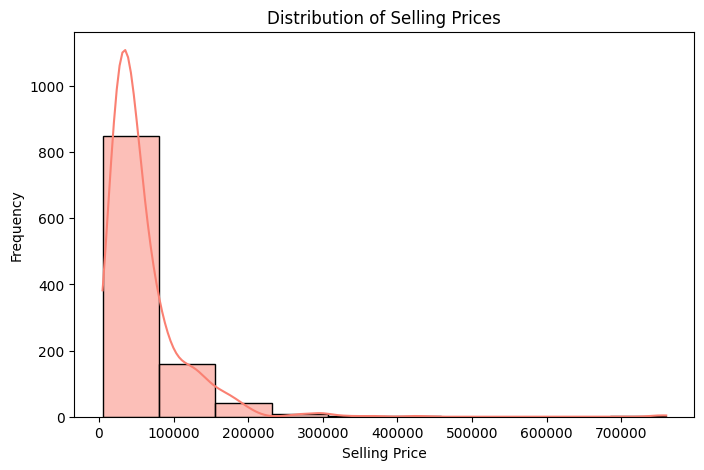

In [9]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the
# overall trend.

#Numerical data >> histogram, distplot, box plot, line chart , pairplot, scatter plot
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=10, kde=True, color='salmon', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


In [10]:
#In the above histogram diagram Selling price of bikes in  between 0 - 100000 and it is a right skewed
df['selling_price'].skew()

# here data is > 0 i.e means +ve skewed

#insights >> This indicates that majority of bikes are in the low to mid-price range,
# while a small number of premium bikes have much higher selling prices.

np.float64(4.993784115724287)

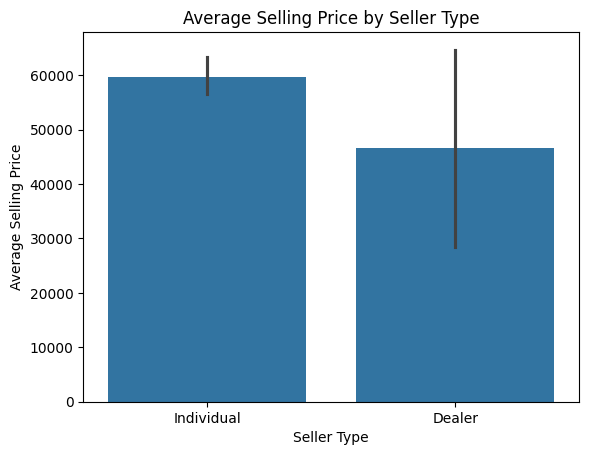

In [11]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type
# and write one observation.

#already loaded required libraries above
#get coloumns list
df.columns

#bar plot

sns.barplot(data=df, x='seller_type', y='selling_price')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()


In [12]:
#insights the averge selling price when compred to seller_type Individual type - selling price is high

avg_km_by_owner: owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


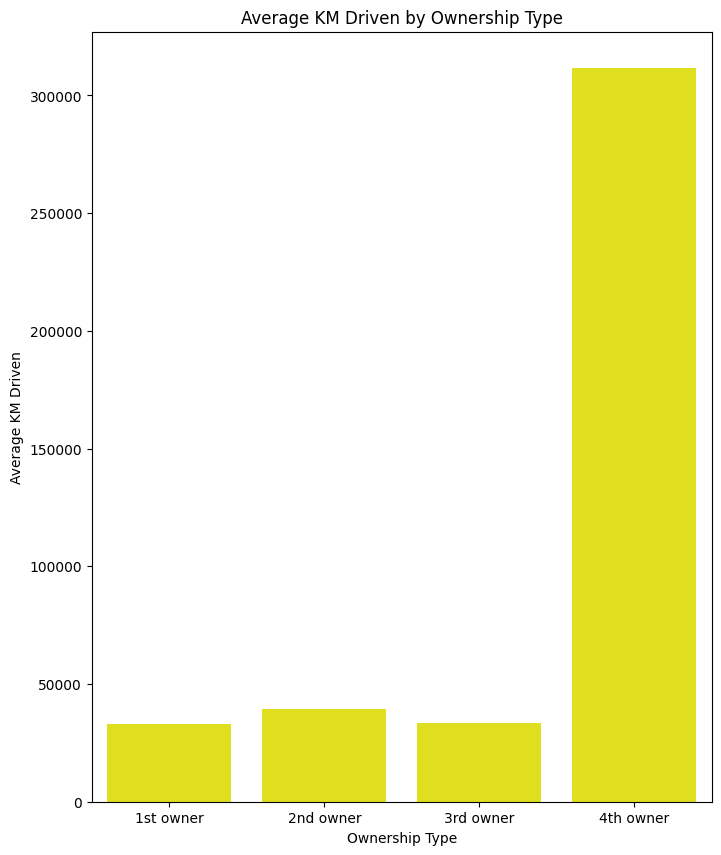

In [20]:
# Question 5: Compute the average km_driven for each ownership type (1st owner,
# 2nd owner, etc.), and present the result as a bar plot.

# required modules are included at top

avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(f"avg_km_by_owner: {avg_km_by_owner}")

# Create a bar plot
plt.figure(figsize= (8,10))
sns.barplot(x=avg_km_by_owner.index, y=avg_km_by_owner.values, color="yellow")
plt.title("Average KM Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average KM Driven")
plt.show()

In [22]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven
# column. Show before-and-after summary statistics.

print("Before removing outliers:\n")
print(df['km_driven'].describe())


Before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


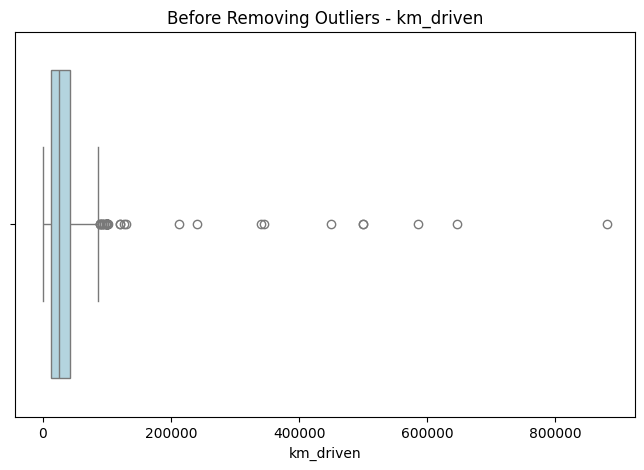

In [23]:
# Visualize before removal
plt.figure(figsize=(8,5))
sns.boxplot(x=df['km_driven'], color='lightblue')
plt.title('Before Removing Outliers - km_driven')
plt.show()

In [27]:
# Calculate IQR and remove outliers IQR = Q3-Q1
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# you can also get this values from describe() 25% and 75%

print(f"Q1 - {Q1}")
print(f"Q3 - {Q3}")

IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

Q1 - 13500.0
Q3 - 43000.0


In [28]:
print("\nAfter removing outliers:\n")
print(df_no_outliers['km_driven'].describe())


After removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


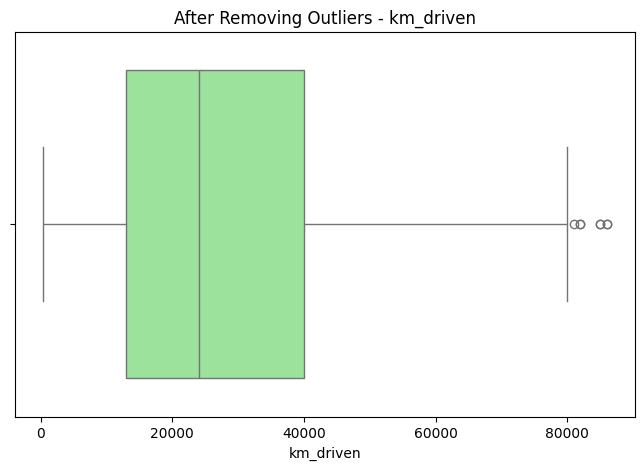

In [29]:
#visuvalizaion after removal
plt.figure(figsize=(8,5))
sns.boxplot(x=df_no_outliers['km_driven'], color='lightgreen')
plt.title("After Removing Outliers - km_driven")
plt.show()

In [30]:
print(f"\nTotal records before: {len(df)}")
print(f"Total records after removing outliers: {len(df_no_outliers)}")
print(f"Records removed: {len(df) - len(df_no_outliers)}")


Total records before: 1061
Total records after removing outliers: 1022
Records removed: 39


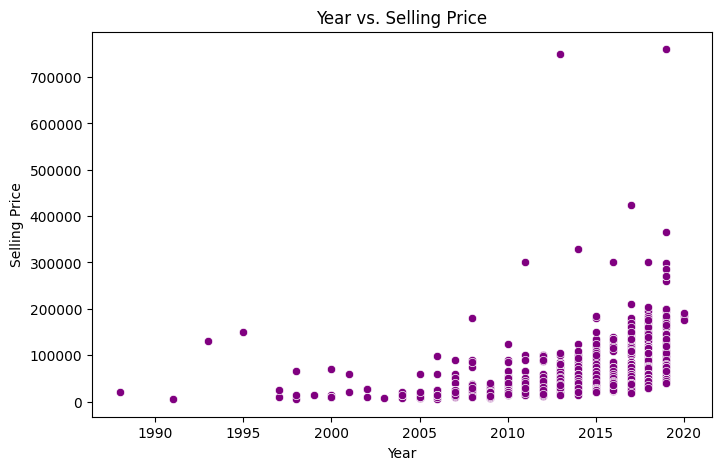

In [31]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the
# relationship between a bike's age and its price.

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='year', y='selling_price', color='purple')
plt.title('Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()


In [32]:
# insights >> From the scatter plot, we can observe that newer bikes (higher year values)
#  generally have higher selling prices,
# while older bikes tend to be sold at lower prices.
#  This shows a negative relationship between bike age and selling price — as a bike gets older,
# its value decreases due to depreciation and wear.

In [36]:
# Question 8: Convert the seller_type column into numeric format using one-hot
# encoding. Display the first 5 rows of the resulting DataFrame.

df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [38]:
# Perform one-hot encoding on 'seller_type'
one_hot_encoding = pd.get_dummies(df,columns=['seller_type'], prefix= "seller_type",  drop_first=True).head()

one_hot_encoding

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,True
1,Honda Dio,45000,2017,1st owner,5650,72752.5,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,True


In [42]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
# What correlations stand out the most?

df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


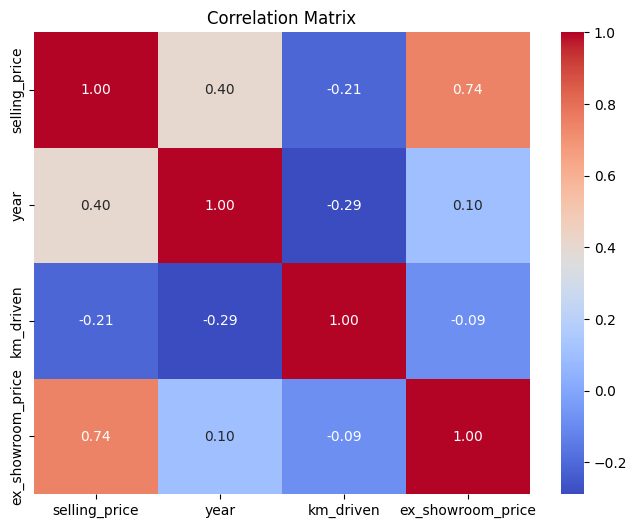

In [44]:
#get only numeric values

num_df = df.select_dtypes(include=['int64','float64'])

#compute correlation matrix
correlation = num_df.corr()

# corr() computes the Pearson correlation coefficient (range: -1 to +1).

# +1 → strong positive correlation

# -1 → strong negative correlation

# 0 → no correlation

# The heatmap helps you visually identify these relationships.

#create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [46]:
# 1) Selling price shows a strong positive correlation with ex_showroom_price — meaning higher showroom
# prices lead to higher resale values.

# 2)Year has a moderate positive correlation with selling_price, indicating newer
# bikes sell for more.

# 3)km_driven has a weak negative correlation with selling_price, suggesting that more usage slightly
# lowers resale value.

Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

```

Based on the analysis and visualizations, the following factors have the most significant impact on a bike's selling price:

1)

->Ex-showroom Price – Strong positive correlation; bikes with higher original prices tend to have higher resale values.

Year (Age of Bike) – Newer bikes have higher prices; older bikes depreciate over time.

Ownership Type – 1st owner bikes sell for higher prices compared to 2nd or 3rd owners.

Kilometers Driven – Negative impact; as distance driven increases, the selling price slightly decreases.

Seller Type – Dealer-listed bikes tend to have higher selling prices compared to individual sellers.

 Insight:
Overall, bike age, ex-showroom price, and ownership history are the strongest predictors of selling price.

2. Data Cleaning Steps

-> During data preprocessing, the following steps were taken to ensure data quality:

Checked for missing values using df.isnull().sum() and handled them appropriately (dropped or imputed).

-> Removed duplicate records if present.

Detected and removed outliers in km_driven using the IQR (Interquartile Range) method.

Ensured all numeric columns had correct data types for analysis.

3. Feature Engineering Steps
->To prepare the data for visualization and modeling:

    1)Converted categorical variables like seller_type, fuel, and transmission to numeric using one-hot encoding.

   2)Selected relevant features for EDA and dropped unnecessary columns.
```